<h1 align="center">Assignment 1</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>

In [499]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. **[5 pts]** Download the data set adult-modified-09-13-2025.csv and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [500]:
adult_census_df = pd.read_csv('adult-modified-09-13-2025.csv')
adult_census_df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,Public,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-employed,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-employed,HS-grad,9,Married,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,13,Married,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [501]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.0+ MB


In [502]:
adult_census_df.groupby("education")["education-num"].unique()

education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
Name: education-num, dtype: object

In [503]:
adult_census_df.describe(include="all")

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
count,32561,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,74,6,16,NaN,6,15,6,5,2,NaN,42,2
top,36,Private,HS-grad,NaN,Married,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,897,22696,10501,NaN,14999,4140,13193,27816,21790,NaN,29170,24720
mean,NaN,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,NaN,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


*First I loaded the csv dataset as a dataframe using pandas libarary. I used head(10) function to see the first 10 rows of the dataframe to check it is loaded correctly. Then I used info() to see the number of non-null count and the datatype of each column. It showed that there were no null values and education-num, hours-per-week has type int64, all other columns was of object datatype. I used describe(include="all") to check the means, standard deviations and other statistics for the numeric attributes. For education-num, the mean education-num was around 10, which suggests that on average people had 10th grade education, minimum education people had was Preschool and maximum education was 16 i.e. Doctorate. The standard deviation 2.57 shows that education-num is on average 2.57 unit far from the mean*

#### 2. **[10 pts]** Using Pandas, compute the number of missing values for each attribute in the data. Fill the missing values for all numeric attributes using the mean value for the attribute. After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. Next, remove columns education and native-country. Show that the final resulting dataframe does not contain missing values and display the new mean and standard deviations for the numeric attributes. For the remaining parts of this assignment, you should use this new dataframe without missing values and the aforementioned columns.

In [504]:
adult_census_df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [505]:
for col in adult_census_df.columns:
    print(col)
    print(adult_census_df[col].unique())

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '?' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '76' '17' '55'
 '61' '70' '64' '33' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87']
workclass
['Public' 'Self-employed' 'Private' '?' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married' 'Divorced' 'Married-spouse-absent' 'Separated'
 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support'

*Looking at the unique values from each column, we can see that '?' is used to denote missing values.*

In [506]:
(adult_census_df == '?').sum()

age                 45
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [507]:
adult_census_df.replace('?', np.nan, inplace=True)
adult_census_df.isna().sum()

age                 45
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [508]:
# To replace the numerical attributes missing values using the mean, we first need to convert those columns to int
adult_census_df['age'] = adult_census_df['age'].astype(float)

In [509]:
age_mean = adult_census_df['age'].mean()
adult_census_df.fillna({'age': age_mean}, axis=0, inplace=True)

In [510]:
# drop all rows where a categorical attribute contains a missing value.
adult_census_df.drop(adult_census_df[adult_census_df.workclass.isnull()].index, axis=0, inplace=True)
adult_census_df.drop(adult_census_df[adult_census_df.occupation.isnull()].index, axis=0, inplace=True)
adult_census_df.drop(adult_census_df[adult_census_df['native-country'].isnull()].index, axis=0, inplace=True)

In [511]:
# remove columns education and native-country. 
adult_census_df.drop(columns=['education', 'native-country'], inplace=True)

In [512]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  object 
 2   education-num   30162 non-null  int64  
 3   marital-status  30162 non-null  object 
 4   occupation      30162 non-null  object 
 5   relationship    30162 non-null  object 
 6   race            30162 non-null  object 
 7   sex             30162 non-null  object 
 8   hours-per-week  30162 non-null  int64  
 9   income          30162 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


In [513]:
adult_census_df.describe()

,age,education-num,hours-per-week
count,30162.000000,30162.000000,30162.000000
mean,38.438107,10.121312,40.931238
std,13.128006,2.549995,11.979984
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


#### 3. **[10 pts]** For the three numeric attributes (age, hours-per-week, education-num), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. education-num (y-axis).

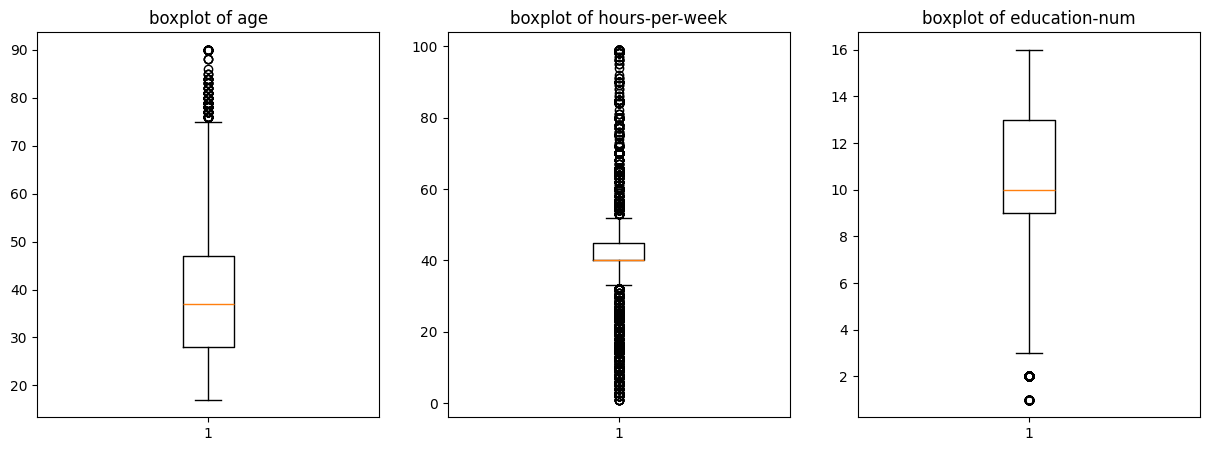

In [514]:
# display box plots that show the overall dispersion and skew
fig, ax = plt.subplots(1,3,figsize=(15, 5))

ax[0].boxplot(adult_census_df['age'])
ax[0].set_title('boxplot of age')

ax[1].boxplot(adult_census_df['hours-per-week'])
ax[1].set_title('boxplot of hours-per-week')

ax[2].boxplot(adult_census_df['education-num'])
ax[2].set_title('boxplot of education-num')

plt.show()

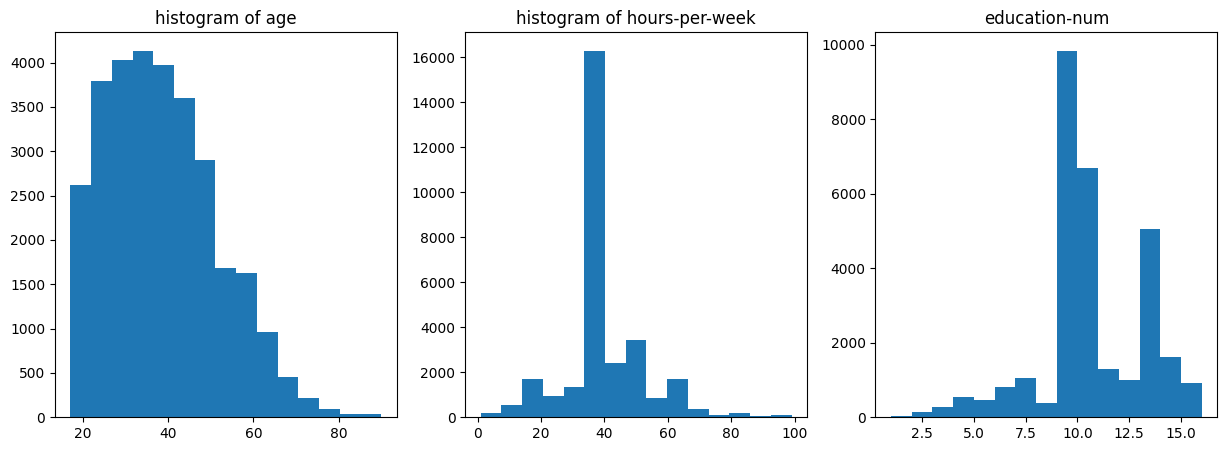

In [515]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(adult_census_df['age'], bins=15)
ax[0].set_title('histogram of age')

ax[1].hist(adult_census_df['hours-per-week'], bins=15)
ax[1].set_title('histogram of hours-per-week')

ax[2].hist(adult_census_df['education-num'], bins=15)
ax[2].set_title('education-num')

plt.show()

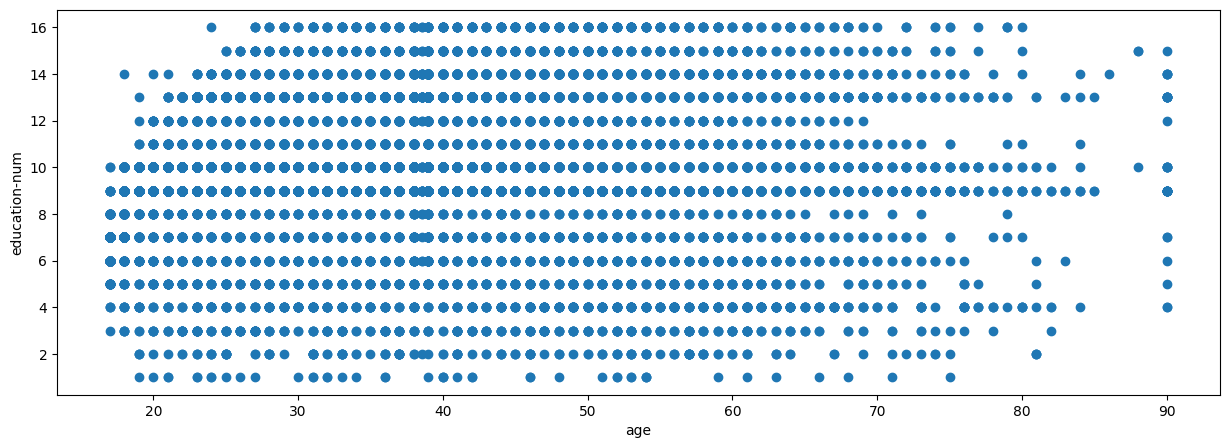

In [516]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(adult_census_df['age'], adult_census_df['education-num'])
plt.xlabel('age')
plt.ylabel('education-num')
plt.show()

#### 4. **[10 pts]** Create bar charts for all the categorical attributes in the data that show the distribution of category frequencies (e.g., Male vs. Female for the sex attribute, Private vs. Public vs. Self-emp, etc. for the workclass attribute, and so on).

In [517]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  object 
 2   education-num   30162 non-null  int64  
 3   marital-status  30162 non-null  object 
 4   occupation      30162 non-null  object 
 5   relationship    30162 non-null  object 
 6   race            30162 non-null  object 
 7   sex             30162 non-null  object 
 8   hours-per-week  30162 non-null  int64  
 9   income          30162 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


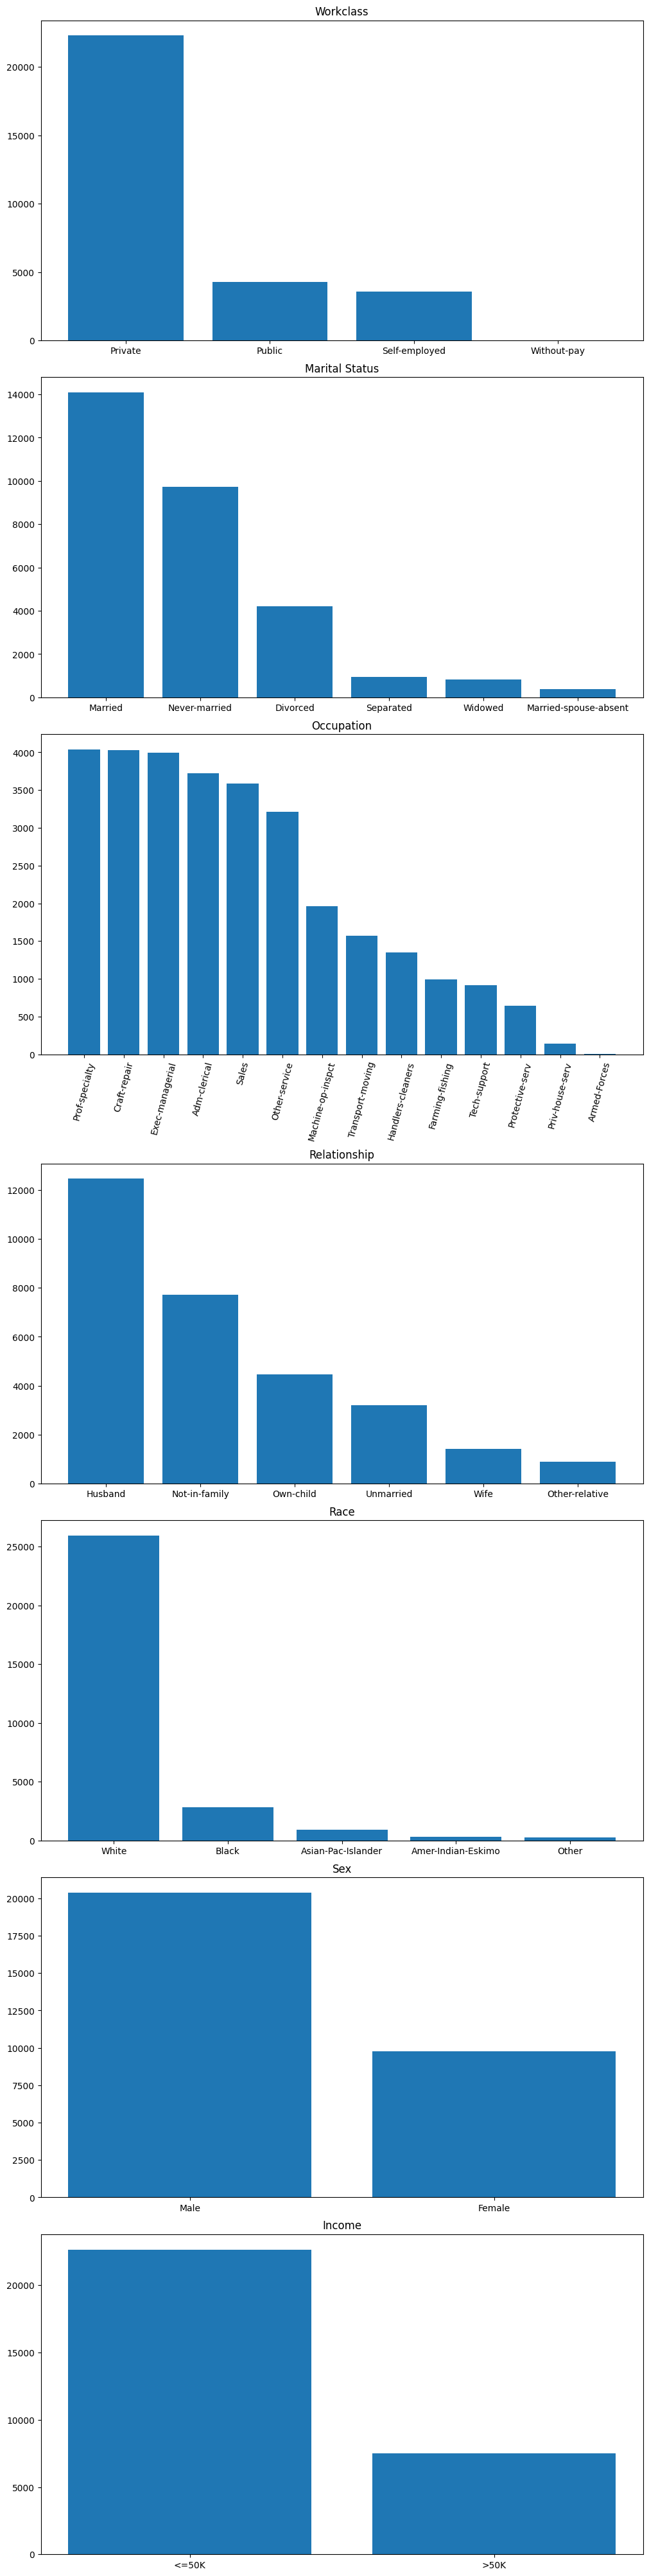

In [518]:
workclass_freq = adult_census_df['workclass'].value_counts()
marital_status_freq = adult_census_df['marital-status'].value_counts()
occupation_freq = adult_census_df['occupation'].value_counts()
relationship_freq = adult_census_df['relationship'].value_counts()
race_freq = adult_census_df['race'].value_counts()
sex_freq = adult_census_df['sex'].value_counts()
income_freq = adult_census_df['income'].value_counts()

fig, ax = plt.subplots(7,1,figsize=(10,40),constrained_layout=True)

ax[0].bar(workclass_freq.index, workclass_freq.values)
ax[0].set_title('Workclass')
ax[1].bar(marital_status_freq.index, marital_status_freq.values)
ax[1].set_title('Marital Status')
ax[2].bar(occupation_freq.index, occupation_freq.values)
ax[2].tick_params(axis='x', rotation=75)
ax[2].set_title('Occupation')
ax[3].bar(relationship_freq.index, relationship_freq.values)
ax[3].set_title('Relationship')
ax[4].bar(race_freq.index, race_freq.values)
ax[4].set_title('Race')
ax[5].bar(sex_freq.index, sex_freq.values)
ax[5].set_title('Sex')
ax[6].bar(income_freq.index, income_freq.values)
ax[6].set_title('Income')

plt.show()

#### 5. **[10 pts]** Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this example graph depicting the cross-tabulation of sex with income (Note: this example is based on a different data set, so yours will be different). In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.

In [519]:
cross_tab_df = pd.crosstab([adult_census_df['workclass'], adult_census_df['race']], adult_census_df['income'])
cross_tab_df

income                            <=50K  >50K
workclass     race                           
Private       Amer-Indian-Eskimo    172    18
              Asian-Pac-Islander    493   162
              Black                1883   217
              Other                 192    12
              White               14670  4467
Public        Amer-Indian-Eskimo     59    11
              Asian-Pac-Islander     89    44
              Black                 486   120
              Other                  13     3
              White                2324  1140
Self-employed Amer-Indian-Eskimo     21     5
              Asian-Pac-Islander     64    42
              Black                  81    29
              Other                   5     6
              White                2088  1232
Without-pay   Asian-Pac-Islander      1     0
              Black                   1     0
              White                  12     0

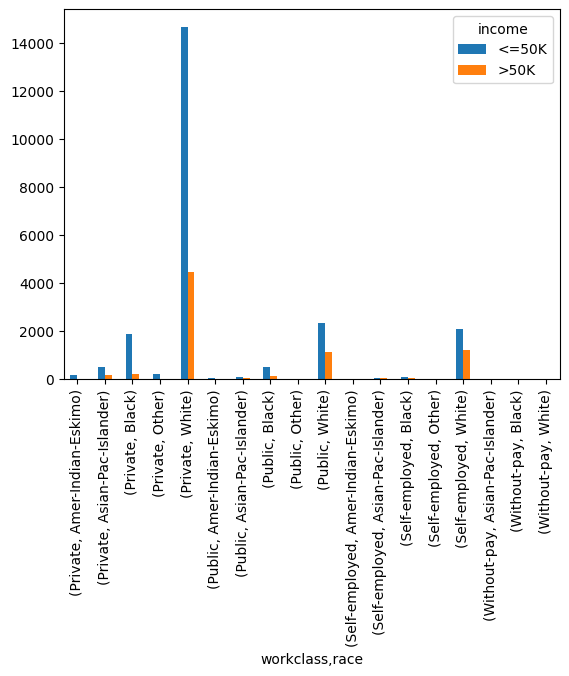

In [520]:
plt.show(cross_tab_df.plot(kind='bar'))

In [521]:
cross_tab_df2 = pd.crosstab(adult_census_df['race'], adult_census_df['income'])
cross_tab_df2

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,647,248
Black,2451,366
Other,210,21
White,19094,6839


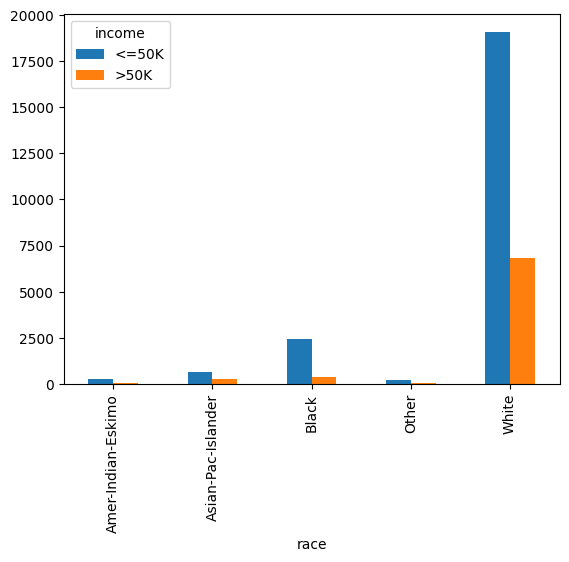

In [522]:
plt.show(cross_tab_df2.plot(kind='bar'))

#### 6. **[10 pts]** Characterize the population group who work in the private sector and who have an education level of less than a bachelor's degree (i.e., education-num values of less than 13). You may consider first creating a separate dataframe consiting of this subset of the data. Then provide an analysis of the key chracteristics of this population group based on the statistics and data distributions of other attributes.

In [523]:
private_bachelor_df = adult_census_df[(adult_census_df['workclass'] == 'Private') & (adult_census_df['education-num'] < 13)]
private_bachelor_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40,<=50K
6,49.0,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,<=50K
10,37.0,Private,10,Married,Exec-managerial,Husband,Black,Male,80,>50K
13,32.0,Private,12,Never-married,Sales,Not-in-family,Black,Male,50,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,22.0,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32556,27.0,Private,12,Married,Tech-support,Wife,White,Female,38,<=50K
32557,40.0,Private,9,Married,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [524]:
private_bachelor_df.describe(include='all')

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
count,17549.000000,17549,17549.000000,17549,17549,17549,17549,17549,17549.000000,17549
unique,NaN,1,NaN,6,13,6,5,2,NaN,2
top,NaN,Private,NaN,Married,Craft-repair,Husband,White,Male,NaN,<=50K
freq,NaN,17549,NaN,7078,2979,6191,14911,11302,NaN,14948
mean,36.264762,NaN,8.919768,NaN,NaN,NaN,NaN,NaN,39.366403,NaN
std,13.125882,NaN,1.851124,NaN,NaN,NaN,NaN,NaN,11.135493,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,25.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,39.000000,NaN
50%,34.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN


#### 7. **[10 pts]** Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. As in the previous problem you may consider first creating separate subsets of the data based on these income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish between the two groups. You may use charts or plots for visualizing the differences in your analysis to support your observations. [**Note**: the discussion of your observations about the key characteristics will be a significant part of the score for this problem.]

In [525]:
low_income_df = adult_census_df[(adult_census_df['income'] == '<=50K')]
low_income_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39.0,Public,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50.0,Self-employed,13,Married,Exec-managerial,Husband,White,Male,13,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28.0,Private,13,Married,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32553,32.0,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,<=50K
32555,22.0,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32556,27.0,Private,12,Married,Tech-support,Wife,White,Female,38,<=50K
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [526]:
low_income_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,22654.0,NaN,NaN,NaN,36.610004,13.45876,17.0,26.0,34.0,45.0,90.0
workclass,22654,4,Private,17410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,22654.0,NaN,NaN,NaN,9.629116,2.413596,1.0,9.0,9.0,10.0,16.0
marital-status,22654,6,Never-married,9256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,22654,14,Adm-clerical,3223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,22654,6,Not-in-family,6903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,22654,5,White,19094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,22654,2,Male,13984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,22654.0,NaN,NaN,NaN,39.348592,11.950774,1.0,38.0,40.0,40.0,99.0
income,22654,1,<=50K,22654,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
high_income_df = adult_census_df[(adult_census_df['income'] == '>50K')]
high_income_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
7,52.0,Self-employed,9,Married,Exec-managerial,Husband,White,Male,45,>50K
8,31.0,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K
9,42.0,Private,13,Married,Exec-managerial,Husband,White,Male,40,>50K
10,37.0,Private,10,Married,Exec-managerial,Husband,Black,Male,80,>50K
11,30.0,Public,13,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,>50K
...,...,...,...,...,...,...,...,...,...,...
32538,38.0,Private,13,Divorced,Prof-specialty,Unmarried,Black,Female,45,>50K
32545,39.0,Public,12,Married,Adm-clerical,Wife,White,Female,20,>50K
32554,53.0,Private,14,Married,Exec-managerial,Husband,White,Male,40,>50K
32557,40.0,Private,9,Married,Machine-op-inspct,Husband,White,Male,40,>50K


In [528]:
high_income_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,7508.0,NaN,NaN,NaN,43.954068,10.262403,19.0,36.0,43.0,51.0,90.0
workclass,7508,3,Private,4876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,7508.0,NaN,NaN,NaN,11.60642,2.368423,2.0,10.0,12.0,13.0,16.0
marital-status,7508,6,Married,6409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,7508,14,Exec-managerial,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,7508,6,Husband,5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,7508,5,White,6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,7508,2,Male,6396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,7508.0,NaN,NaN,NaN,45.70658,10.736987,1.0,40.0,40.0,50.0,99.0
income,7508,1,>50K,7508,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [529]:
def visualize_attributes(df):
 for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype in ['int64', 'float64']:
        df[col].plot(kind='hist')
        plt.title(f'Histogram of {col}')
    else: # Assuming categorical
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count' if df[col].dtype == 'object' else 'Frequency')
    plt.tight_layout()
    plt.show()

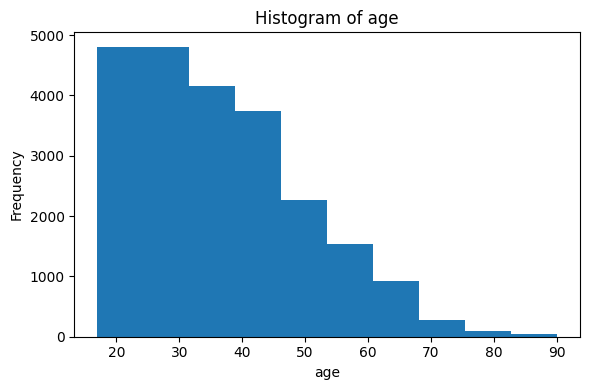

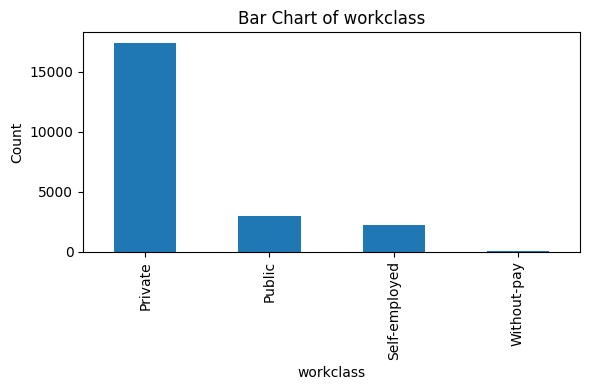

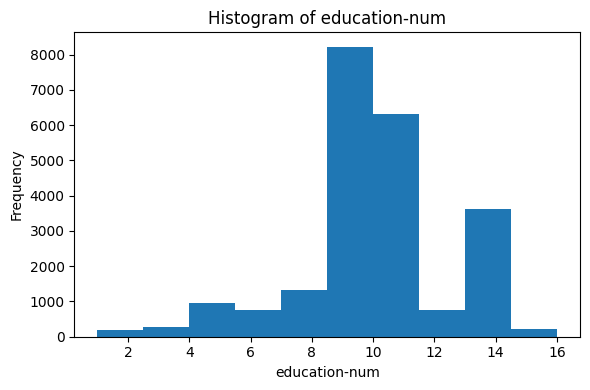

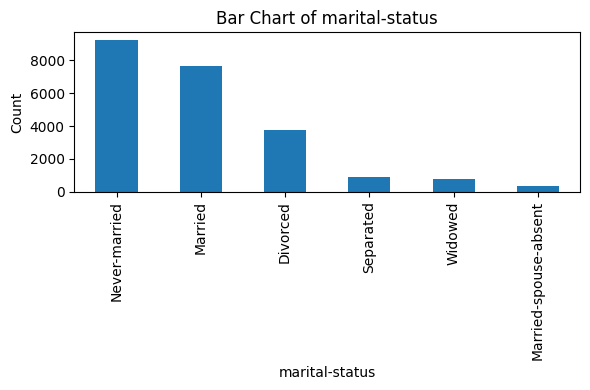

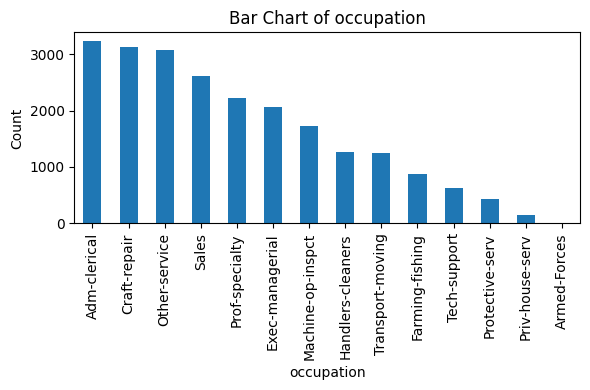

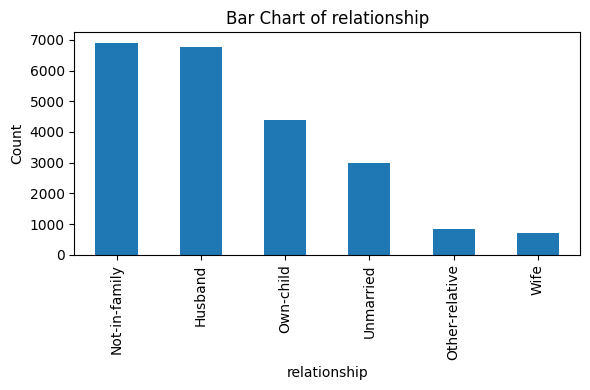

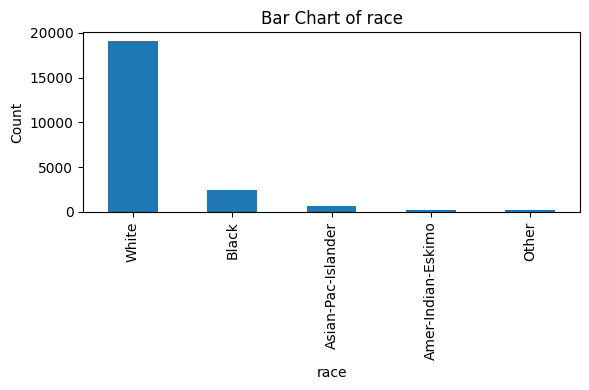

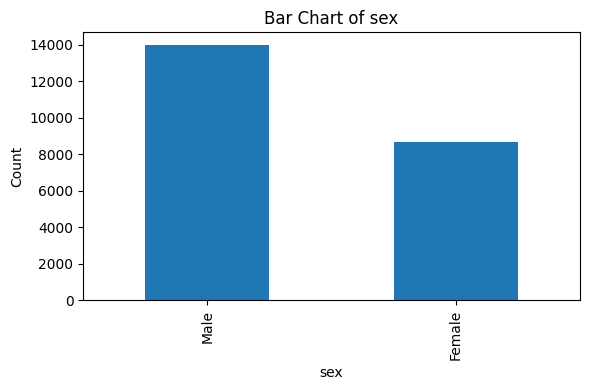

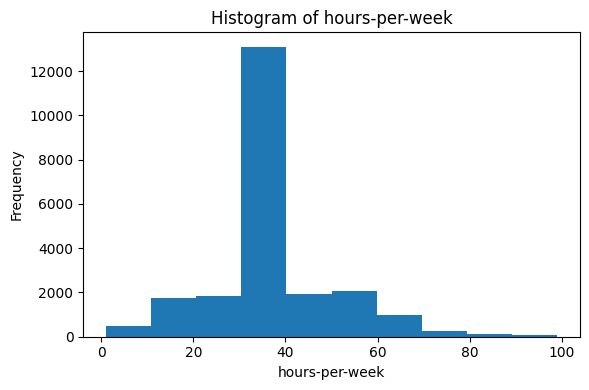

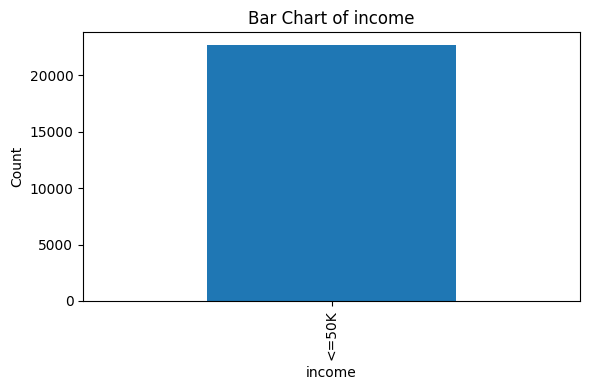

In [530]:
visualize_attributes(low_income_df)

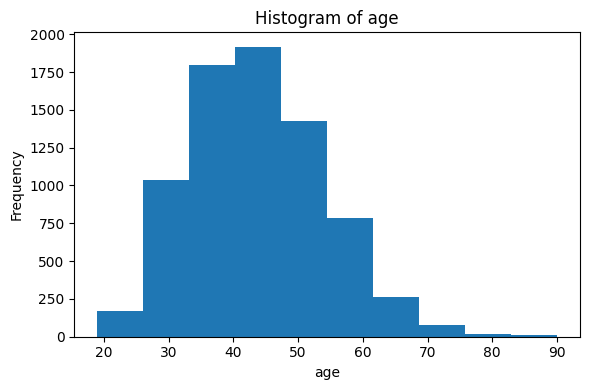

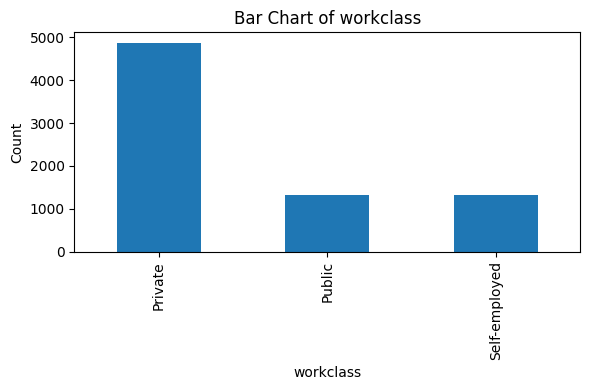

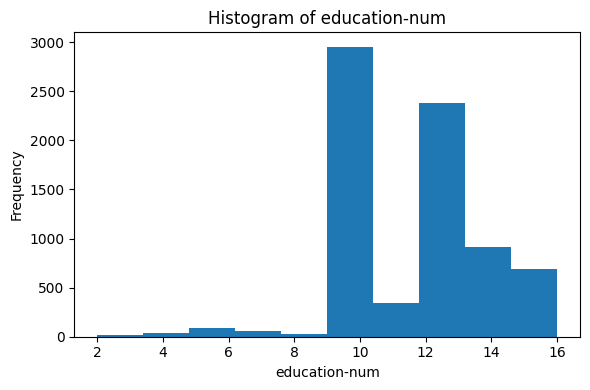

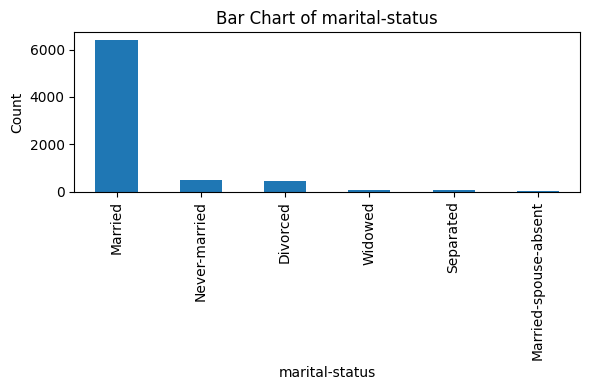

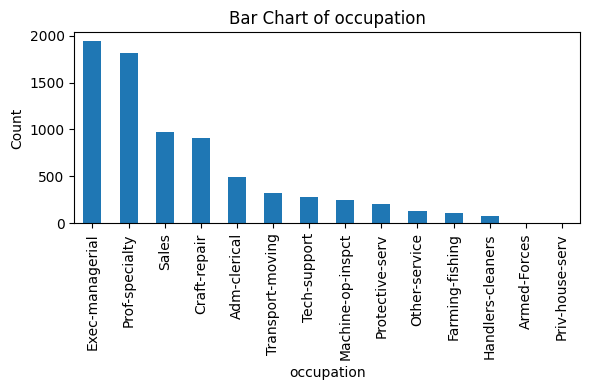

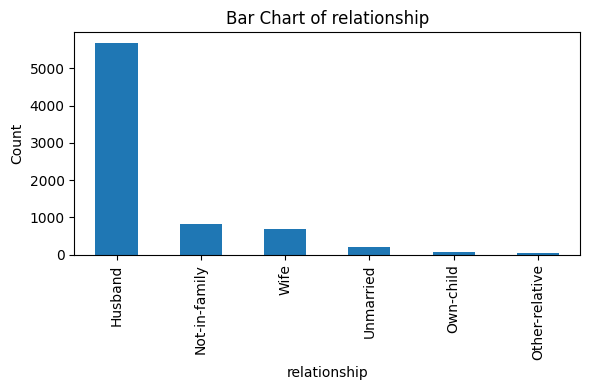

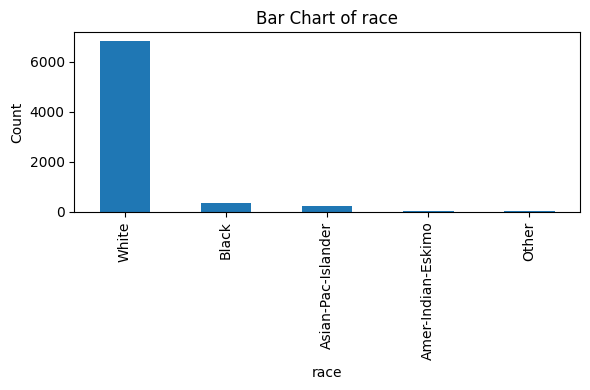

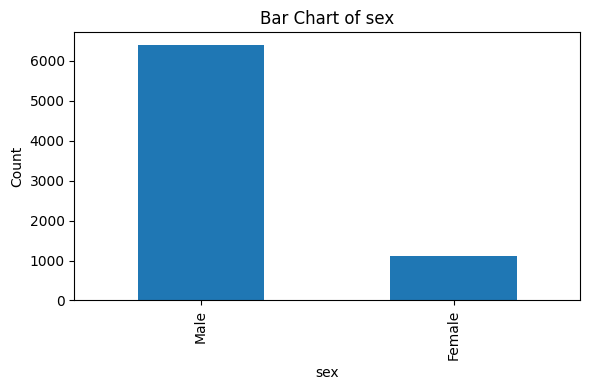

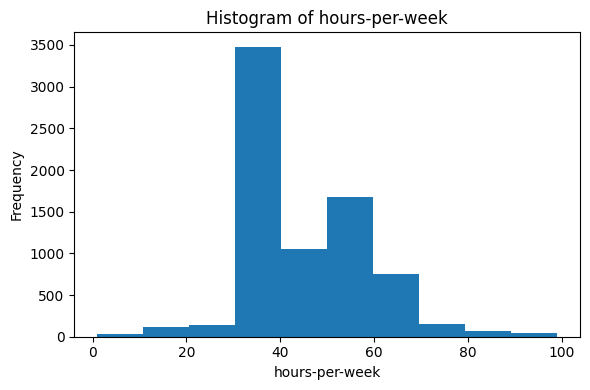

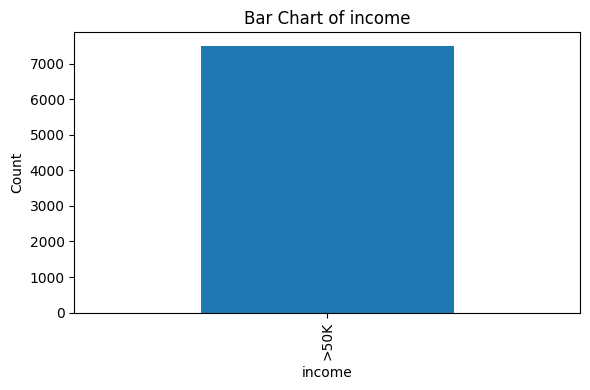

In [531]:
visualize_attributes(high_income_df)

#### 8. **[10 pts]** Convert the data into the **standard spreadsheet format**. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called **adult_numeric.csv**.

In [534]:
std_format_df = pd.get_dummies(adult_census_df)
std_format_df.head(10)

,age,education-num,hours-per-week,workclass_Private,workclass_Public,workclass_Self-employed,workclass_Without-pay,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,50.0,13,13,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False
2,38.0,9,40,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
3,53.0,7,40,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
4,28.0,13,40,True,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
5,37.0,14,40,True,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
6,49.0,5,16,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False
7,52.0,9,45,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
8,31.0,14,50,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
9,42.0,13,40,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [533]:
std_format_df.to_csv('adult_numeric.csv', float_format="%1.2f)

age                                     float64
education-num                             int64
hours-per-week                            int64
workclass_Private                          bool
workclass_Public                           bool
workclass_Self-employed                    bool
workclass_Without-pay                      bool
marital-status_Divorced                    bool
marital-status_Married                     bool
marital-status_Married-spouse-absent       bool
marital-status_Never-married               bool
marital-status_Separated                   bool
marital-status_Widowed                     bool
occupation_Adm-clerical                    bool
occupation_Armed-Forces                    bool
occupation_Craft-repair                    bool
occupation_Exec-managerial                 bool
occupation_Farming-fishing                 bool
occupation_Handlers-cleaners               bool
occupation_Machine-op-inspct               bool
occupation_Other-service                